In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sbody = '2004 PY107'
objname = '2004PY107'
dt=500.
#path = 'Asteroids/'+objname
path = 'TNOs/'+objname
series = pd.read_csv(path+'/series.csv')

t = series['t'].values
a = series['a'].values
e = series['e'].values
inc = series['inc'].values*np.pi/180
#omega = series['omega'].values*np.pi/180
#Omega = series['Omega'].values*np.pi/180
#M = series['M'].values*np.pi/180
#h = np.sin(inc)*np.sin(Omega)
#k = np.sin(inc)*np.cos(Omega)
#p = e*np.sin(Omega+omega)
#q = e*np.cos(Omega+omega)

hj = series['hj'].values
kj = series['kj'].values
pj = series['pj'].values
qj = series['qj'].values

hs = series['hs'].values
ks = series['ks'].values
ps = series['ps'].values
qs = series['qs'].values

hn = series['hn'].values
kn = series['kn'].values
pn = series['pn'].values
qn = series['qn'].values

hu = series['hu'].values
ku = series['ku'].values
pu = series['pu'].values
qu = series['qu'].values

plt.scatter(t,h)
plt.show()
plt.scatter(t,h-np.sin(t))

KeyboardInterrupt: 

In [ ]:
pYh = np.abs(np.fft.rfft(h))
pYhj = np.abs(np.fft.rfft(hj))
pYhs = np.abs(np.fft.rfft(hs))
pYhu = np.abs(np.fft.rfft(hu))
pYhn = np.abs(np.fft.rfft(hn))

ihumax = np.argmax(pYhu[1:])+1
ihnmax = np.argmax(pYhn[1:])+1 
ihsmax = np.argmax(pYhs[1:])+1 
ihjmax = np.argmax(pYhj[1:])+1 

n = len(h)
freq = np.fft.rfftfreq(n,d=dt)
plt.figure(figsize=(12,8))
xs = [1,10000]
plt.vlines(x = [1/freq[ihumax], 1/freq[ihnmax], 1/freq[ihsmax], 1/freq[ihjmax]], ymin = 0, ymax = max(xs),
           colors = 'purple',
           label = 'vline_multiple - full height')
plt.scatter(1/freq[1:],pYh[1:],label='particle',c='k')
plt.scatter(1/freq[1:],pYhj[1:],label='particle',c='b')
plt.scatter(1/freq[1:],pYhs[1:],label='particle',c='r')
plt.scatter(1/freq[1:],pYhu[1:],label='particle',c='y')
plt.scatter(1/freq[1:],pYhn[1:],label='particle',c='g')
plt.xscale('log')
plt.yscale('log')

In [ ]:
plt.figure(figsize=(12,8))
xs = [1,4000]
plt.vlines(x = [1/freq[ihumax], 1/freq[ihnmax], 1/freq[ihsmax], 1/freq[ihjmax]], ymin = 0, ymax = max(xs),
           colors = 'purple',
           label = 'vline_multiple - full height')
plt.scatter(1/freq[1:],pYhj[1:],label='particle',c='b')
plt.xscale('log')
plt.yscale('log')

In [ ]:
from scipy.optimize import minimize 
from scipy import stats
#x = np.linspace(-10, 30, 100)

print(len(pYhj),ihjmax)
x = t

#print(x)

# create a normally distributed residual
e = np.random.normal(10, 5, 100)

# generate ground truth
y = h

def MLE_Norm(parameters, freq):
    # extract parameters
    const, phase, std_dev = parameters
    # predict the output
    pred = const*np.sin(freq*2*np.pi*t+phase)
    #pred = const/beta/np.sqrt(2*np.pi)*np.exp(-0.5*((x-std_dev)/beta)**2)
    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
    # Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL

mle_model = minimize(MLE_Norm, np.array([1,0.5,2]), method='Nelder-Mead', args=freq[ihjmax])
print(mle_model.x)

plt.plot(y)
plt.show()
const = mle_model.x[0]
phase = mle_model.x[1]
std_dev = mle_model.x[2]

#const = 35000
#beta = 300
#std_dev = 5
guess = const*np.sin(freq[ihjmax]*2*np.pi*x+phase)
#print(guess)
plt.plot(guess)
plt.show()

plt.plot(y-guess)


In [ ]:
from rocks import Rock
ceres = Rock("2004 py107")
print(ceres.e)

In [ ]:
gp_data = pd.read_csv('gp_freqs.csv')

astdys = pd.read_csv('TNOs/astdys_tnos.csv')
print(gp_data.columns)
print(astdys.columns)
drop_cols = []
for i in range(len(astdys)):
    obj = astdys['Name'][i]
    horizons = pd.read_csv('TNOs/'+obj+'/horizon_data.csv')
    
    series = pd.read_csv('TNOs/'+obj+'/series.csv')
    sma_fin = series['a'].values[-1]
    vals = series['ecc'].values >= 1
    if horizons['flag'][0] == 0:
        drop_cols.append(i)
        print('obj ', obj, ' didn\'t run because of jpl horizons')
    
    elif sma_fin > 80 or sma_fin < 20:
        drop_cols.append(i)
        print('obj ', obj, ' was ejected in simulation with final sma = ', series['a'].values[-1])
    
    elif np.any(vals):
        drop_cols.append(i)
        print('obj ', obj, ' was ejected in simulation with final ecc = ', series['ecc'].values[-1])

astdys = astdys.drop(drop_cols)
gp_data = gp_data.drop(drop_cols)
print(len(drop_cols), ' systems cannot produce good proper elements due to JPL Horizons or an ejection during simulation')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#print(astdys)
fig,ax = plt.subplots(2,2, figsize=(16,12))
im1 = ax[0,0].scatter(1/gp_data['h_j_freq'],np.abs(gp_data['h_j_amp'])**2,c=astdys['a(AU)'],s=4)
im2 = ax[0,1].scatter(1/gp_data['k_j_freq'],np.abs(gp_data['k_j_amp'])**2,c=astdys['a(AU)'],s=1)
im3 = ax[1,0].scatter(1/gp_data['p_j_freq'],np.abs(gp_data['p_j_amp'])**2,c=astdys['a(AU)'],s=1)
im4 = ax[1,1].scatter(1/gp_data['q_j_freq'],np.abs(gp_data['q_j_amp'])**2,c=astdys['a(AU)'],s=1)
ax[0,0].set_ylabel('Peak Amp')
ax[0,0].set_xlabel('Peak Period (yrs)')
ax[0,1].set_ylabel('Peak Amp')
ax[0,1].set_xlabel('Peak Period (yrs)')
ax[1,0].set_ylabel('Peak Amp')
ax[1,0].set_xlabel('Peak Period (yrs)')
ax[1,1].set_ylabel('Peak Amp')
ax[1,1].set_xlabel('Peak Period (yrs)')
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

ax[0,0].set_xlim(np.mean(1/gp_data['h_j_freq'])-np.std(1/gp_data['h_j_freq']),np.mean(1/gp_data['h_j_freq'])+np.std(1/gp_data['h_j_freq']))
ax[0,1].set_xlim(np.mean(1/gp_data['k_j_freq'])-np.std(1/gp_data['k_j_freq']),np.mean(1/gp_data['k_j_freq'])+np.std(1/gp_data['k_j_freq']))
ax[1,0].set_xlim(np.mean(1/gp_data['p_j_freq'])-np.std(1/gp_data['p_j_freq']),np.mean(1/gp_data['p_j_freq'])+np.std(1/gp_data['p_j_freq']))
ax[1,1].set_xlim(np.mean(1/gp_data['q_j_freq'])-np.std(1/gp_data['q_j_freq']),np.mean(1/gp_data['q_j_freq'])+np.std(1/gp_data['q_j_freq']))

#ax[0,0].set_ylim(np.mean(1/gp_data['h_j_freq'])-np.std(1/gp_data['h_j_freq']),np.mean(1/gp_data['h_j_freq'])+np.std(1/gp_data['h_j_freq']))
ax[0,0].set_title('H Freq Amplitude')
ax[0,1].set_title('K Freq Amplitude')
ax[1,0].set_title('P Freq Amplitude')
ax[1,1].set_title('Q Freq Amplitude')
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im1,ax=ax[0,0])
fig.colorbar(im2,ax=ax[0,1])
fig.colorbar(im3,ax=ax[1,0])
fig.colorbar(im4,ax=ax[1,1])
plt.suptitle('Jupiter Peak Amplitudes')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#print(astdys)
fig,ax = plt.subplots(2,2, figsize=(16,12))
im1 = ax[0,0].scatter(1/gp_data['h_s_freq'],np.abs(gp_data['h_s_amp'])**2,c=astdys['a(AU)'],s=4)
im2 = ax[0,1].scatter(1/gp_data['k_s_freq'],np.abs(gp_data['k_s_amp'])**2,c=astdys['a(AU)'],s=1)
im3 = ax[1,0].scatter(1/gp_data['p_s_freq'],np.abs(gp_data['p_s_amp'])**2,c=astdys['a(AU)'],s=1)
im4 = ax[1,1].scatter(1/gp_data['q_s_freq'],np.abs(gp_data['q_s_amp'])**2,c=astdys['a(AU)'],s=1)
ax[0,0].set_ylabel('Peak Amp')
ax[0,0].set_xlabel('Peak Period (yrs)')
ax[0,1].set_ylabel('Peak Amp')
ax[0,1].set_xlabel('Peak Period (yrs)')
ax[1,0].set_ylabel('Peak Amp')
ax[1,0].set_xlabel('Peak Period (yrs)')
ax[1,1].set_ylabel('Peak Amp')
ax[1,1].set_xlabel('Peak Period (yrs)')
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

ax[0,0].set_xlim(np.mean(1/gp_data['h_s_freq'])-np.std(1/gp_data['h_s_freq']),np.mean(1/gp_data['h_s_freq'])+np.std(1/gp_data['h_s_freq']))
ax[0,1].set_xlim(np.mean(1/gp_data['k_s_freq'])-np.std(1/gp_data['k_s_freq']),np.mean(1/gp_data['k_s_freq'])+np.std(1/gp_data['k_s_freq']))
ax[1,0].set_xlim(np.mean(1/gp_data['p_s_freq'])-np.std(1/gp_data['p_s_freq']),np.mean(1/gp_data['p_s_freq'])+np.std(1/gp_data['p_s_freq']))
ax[1,1].set_xlim(np.mean(1/gp_data['q_s_freq'])-np.std(1/gp_data['q_s_freq']),np.mean(1/gp_data['q_s_freq'])+np.std(1/gp_data['q_s_freq']))

#ax[0,0].set_ylim(np.mean(1/gp_data['h_j_freq'])-np.std(1/gp_data['h_j_freq']),np.mean(1/gp_data['h_j_freq'])+np.std(1/gp_data['h_j_freq']))
ax[0,0].set_title('H Freq Amplitude')
ax[0,1].set_title('K Freq Amplitude')
ax[1,0].set_title('P Freq Amplitude')
ax[1,1].set_title('Q Freq Amplitude')
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im1,ax=ax[0,0])
fig.colorbar(im2,ax=ax[0,1])
fig.colorbar(im3,ax=ax[1,0])
fig.colorbar(im4,ax=ax[1,1])
plt.suptitle('Saturn Peak Amplitudes')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#print(astdys)
fig,ax = plt.subplots(2,2, figsize=(16,12))
im1 = ax[0,0].scatter(1/gp_data['h_u_freq'],np.abs(gp_data['h_u_amp'])**2,c=astdys['a(AU)'],s=4)
im2 = ax[0,1].scatter(1/gp_data['k_u_freq'],np.abs(gp_data['k_u_amp'])**2,c=astdys['a(AU)'],s=1)
im3 = ax[1,0].scatter(1/gp_data['p_u_freq'],np.abs(gp_data['p_u_amp'])**2,c=astdys['a(AU)'],s=1)
im4 = ax[1,1].scatter(1/gp_data['q_u_freq'],np.abs(gp_data['q_u_amp'])**2,c=astdys['a(AU)'],s=1)
ax[0,0].set_ylabel('Peak Amp')
ax[0,0].set_xlabel('Peak Period (yrs)')
ax[0,1].set_ylabel('Peak Amp')
ax[0,1].set_xlabel('Peak Period (yrs)')
ax[1,0].set_ylabel('Peak Amp')
ax[1,0].set_xlabel('Peak Period (yrs)')
ax[1,1].set_ylabel('Peak Amp')
ax[1,1].set_xlabel('Peak Period (yrs)')
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

ax[0,0].set_xlim(np.mean(1/gp_data['h_u_freq'])-np.std(1/gp_data['h_u_freq']),np.mean(1/gp_data['h_u_freq'])+np.std(1/gp_data['h_u_freq']))
ax[0,1].set_xlim(np.mean(1/gp_data['k_u_freq'])-np.std(1/gp_data['k_u_freq']),np.mean(1/gp_data['k_u_freq'])+np.std(1/gp_data['k_u_freq']))
ax[1,0].set_xlim(np.mean(1/gp_data['p_u_freq'])-np.std(1/gp_data['p_u_freq']),np.mean(1/gp_data['p_u_freq'])+np.std(1/gp_data['p_u_freq']))
ax[1,1].set_xlim(np.mean(1/gp_data['q_u_freq'])-np.std(1/gp_data['q_u_freq']),np.mean(1/gp_data['q_u_freq'])+np.std(1/gp_data['q_u_freq']))

#ax[0,0].set_ylim(np.mean(1/gp_data['h_j_freq'])-np.std(1/gp_data['h_j_freq']),np.mean(1/gp_data['h_j_freq'])+np.std(1/gp_data['h_j_freq']))
ax[0,0].set_title('H Freq Amplitude')
ax[0,1].set_title('K Freq Amplitude')
ax[1,0].set_title('P Freq Amplitude')
ax[1,1].set_title('Q Freq Amplitude')
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im1,ax=ax[0,0])
fig.colorbar(im2,ax=ax[0,1])
fig.colorbar(im3,ax=ax[1,0])
fig.colorbar(im4,ax=ax[1,1])
plt.suptitle('Uranus Peak Amplitudes')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#print(astdys)
fig,ax = plt.subplots(2,2, figsize=(16,12))
im1 = ax[0,0].scatter(1/gp_data['h_n_freq'],np.abs(gp_data['h_n_amp'])**2,c=astdys['a(AU)'],s=4)
im2 = ax[0,1].scatter(1/gp_data['k_n_freq'],np.abs(gp_data['k_n_amp'])**2,c=astdys['a(AU)'],s=1)
im3 = ax[1,0].scatter(1/gp_data['p_n_freq'],np.abs(gp_data['p_n_amp'])**2,c=astdys['a(AU)'],s=1)
im4 = ax[1,1].scatter(1/gp_data['q_n_freq'],np.abs(gp_data['q_n_amp'])**2,c=astdys['a(AU)'],s=1)
ax[0,0].set_ylabel('Peak Amp')
ax[0,0].set_xlabel('Peak Period (yrs)')
ax[0,1].set_ylabel('Peak Amp')
ax[0,1].set_xlabel('Peak Period (yrs)')
ax[1,0].set_ylabel('Peak Amp')
ax[1,0].set_xlabel('Peak Period (yrs)')
ax[1,1].set_ylabel('Peak Amp')
ax[1,1].set_xlabel('Peak Period (yrs)')
ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')

ax[0,0].set_xlim(np.mean(1/gp_data['h_n_freq'])-np.std(1/gp_data['h_n_freq']),np.mean(1/gp_data['h_n_freq'])+np.std(1/gp_data['h_n_freq']))
ax[0,1].set_xlim(np.mean(1/gp_data['k_n_freq'])-np.std(1/gp_data['k_n_freq']),np.mean(1/gp_data['k_n_freq'])+np.std(1/gp_data['k_n_freq']))
ax[1,0].set_xlim(np.mean(1/gp_data['p_n_freq'])-np.std(1/gp_data['p_n_freq']),np.mean(1/gp_data['p_n_freq'])+np.std(1/gp_data['p_n_freq']))
ax[1,1].set_xlim(np.mean(1/gp_data['q_n_freq'])-np.std(1/gp_data['q_n_freq']),np.mean(1/gp_data['q_n_freq'])+np.std(1/gp_data['q_n_freq']))

#ax[0,0].set_ylim(np.mean(1/gp_data['h_j_freq'])-np.std(1/gp_data['h_j_freq']),np.mean(1/gp_data['h_j_freq'])+np.std(1/gp_data['h_j_freq']))
ax[0,0].set_title('H Freq Amplitude')
ax[0,1].set_title('K Freq Amplitude')
ax[1,0].set_title('P Freq Amplitude')
ax[1,1].set_title('Q Freq Amplitude')
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im1,ax=ax[0,0])
fig.colorbar(im2,ax=ax[0,1])
fig.colorbar(im3,ax=ax[1,0])
fig.colorbar(im4,ax=ax[1,1])
plt.suptitle('Neptune Peak Amplitudes')
plt.show()

In [ ]:
prop_elem = pd.read_csv('prop_elem.csv')
prop_elem = prop_elem.drop(drop_cols)

print(len(drop_cols))
print(len(prop_elem))
#for i in range(len(astdys)):
#    series = pd.read_csv()
data = range(0,len(prop_elem))
data=np.array(data)/len(prop_elem)*0.7
plt.scatter(data,data,s=0.1)
plt.scatter(prop_elem['ast_sinI'],prop_elem['calc_sinI'],s=0.5)
plt.title('sinI Comp')
plt.xlabel('astdys sinI')
plt.ylabel('Calc sinI')
#plt.gca().set_aspect('equal')
plt.show()

data = range(0,len(prop_elem))
data=np.array(data)/len(prop_elem)*0.35
plt.scatter(data,data,s=0.1)
plt.scatter(prop_elem['ast_ecc'],prop_elem['calc_ecc'],s=0.5)
#plt.gca().set_aspect('equal')
plt.title('ecc Comp')
plt.xlabel('astdys ec')
plt.ylabel('Calc ecc')
plt.show()

In [ ]:
sinI_res = prop_elem['calc_sinI']-prop_elem['ast_sinI']
ecc_res = prop_elem['calc_ecc']-prop_elem['ast_ecc']

plt.scatter(ecc_res,sinI_res)
plt.show()
#plt.plot(ecc_res)
#plt.show()

stddev_i = np.sqrt(np.sum(sinI_res**2)/len(sinI_res))
stddev_e = np.sqrt(np.sum(ecc_res**2)/len(sinI_res))

stddev_i = np.std(sinI_res)
stddev_e = np.std(ecc_res)
print(np.sqrt(np.mean(sinI_res**2)),np.sqrt(np.mean(ecc_res**2)))
print('sinI RMSE: ', stddev_i)
print('Ecc RMSE: ',stddev_e)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
astdys = pd.read_csv('data_files/astdys_tnos.csv')

print(astdys)

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].scatter(astdys['a(AU)'].values,astdys['e'].values,s=4)
ax[0].set_xlabel('a(AU)')
ax[0].set_ylabel('ecc')
ax[1].scatter(astdys['a(AU)'].values,np.arcsin(astdys['sinI'].values)/np.pi*180,s=4)
ax[1].set_xlabel('a(AU)')
ax[1].set_ylabel('sin(inc)')
ax[0].set_title('TNO Population in Ecc')
ax[1].set_title('TNO Population in sin(Inc)')

25
Sim made
Sims/DEEP/5
   Unnamed: 0  flag        sbx        sby        sbz      sbvx     sbvy  \
0           0   1.0 -26.107605  20.993691 -22.369501 -0.200407 -0.86365   

       sbvz      epoch  
0 -0.576636  2458725.5  
Data Read
Sim starting
making barycenter
['mercury', 'venus', 'earth', 'mars']
Adding planets
5_bf
done
2458725.5
Starting Integration
Simulation integration finished in  0:00:01.249919  seconds.


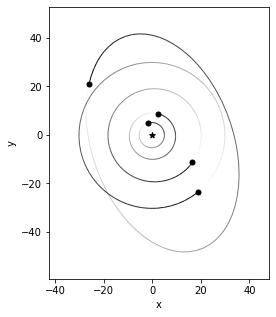

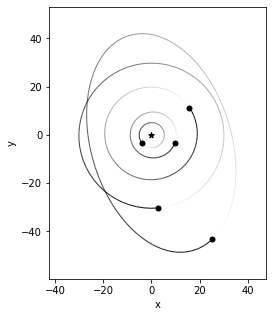

In [5]:
import sys
import commentjson as json
sys.path.insert(0, '../src')
sys.path.insert(0, '../')
import run_reb
import rebound
import numpy as np
import pandas as pd


objtype = 'DEEP'
objname = '5'
sbody = objname
flag, epoch, sim = run_reb.initialize_simulation(planets=['jupiter','saturn','uranus','neptune'],des=objname,clones=0, folder = objtype)
op = rebound.OrbitPlot(sim)
com = sim.calculate_com()

p = sim.particles[sbody+"_bf"]
o = p.calculate_orbit(com)
r2d = 180./np.pi
    
tmax = 1e5
tout = 1e2
filetype= 'DEEP'

sim = run_reb.run_simulation(sim, tmax=tmax, tout=tout,filename="archive_test.bin",deletefile=True,mindist=20.)
op = rebound.OrbitPlot(sim)
print(sim.)

In [8]:
print(sim.particles[0])
print(sim.particles[1])
print(sim.particles[2])
print(sim.particles[3])
print(sim.particles[4])
print(sim.particles[5])
print(sim.particles[5].a)

<rebound.particle.Particle object at 0x7f2e2c233510, m=1.000005976998622 x=0.00018564801970157656 y=0.005202362928013818 z=-5.430673340523921e-07 vx=-0.0018300921447360439 vy=0.0015136292895683657 vz=4.3518148988818033e-05>
<rebound.particle.Particle object at 0x7f2e2c233510, m=0.0009547919099366 x=-3.974479681302004 y=-3.3337926705624104 z=0.09843810286035572 vx=1.6979999631784903 vy=-2.1745194270127843 vz=-0.02802093456924574>
<rebound.particle.Particle object at 0x7f2e2c233510, m=0.0002858856700231 x=9.716800212536667 y=-3.3231793896290296 z=-0.35419786038501866 vx=0.6481427295315374 vy=1.7683618402083177 vz=-0.05057348402043501>
<rebound.particle.Particle object at 0x7f2e2c233510, m=4.366249613200408e-05 x=15.755259713470243 y=11.251475162425901 z=-0.4009242957429752 vx=-0.7906443322911327 vy=1.1821404802356585 vz=-0.014507641959421086>
<rebound.particle.Particle object at 0x7f2e2c233510, m=5.151383772628657e-05 x=2.782631179860047 y=-30.293488982306787 z=0.4915303461690705 vx=1.12

In [14]:
from bin_to_df import bin_to_df
folder = 'DEEP'
filename = '2'
fullfile = 'Sims/'+str(folder)+ '/' + str(filename)+'/archive.bin'
print(fullfile)
arc1 = rebound.SimulationArchive(fullfile)
series = bin_to_df(folder,filename,arc1)
print(series)

Sims/DEEP/2/archive.bin


/home/byu.local/djspenc/.SBDynT/lib/python3.7/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


                  t          a       ecc         an      eccn         inc  \
0      0.000000e+00  47.404197  0.161596  30.063787  0.008725  113.936767   
1      1.000040e+04  47.414385  0.161897  30.067090  0.010290  113.929110   
2      2.000000e+04  47.413803  0.161602  30.056058  0.009562  113.925168   
3      3.000000e+04  47.419789  0.161942  30.063396  0.010115  113.921486   
4      4.000000e+04  47.409796  0.161433  30.067997  0.011149  113.923222   
...             ...        ...       ...        ...       ...         ...   
9996   9.996000e+07  47.402925  0.162172  30.063193  0.011409  115.962432   
9997   9.997000e+07  47.408398  0.162008  30.066643  0.011113  115.962047   
9998   9.998000e+07  47.435765  0.162862  30.060988  0.010627  115.954254   
9999   9.999000e+07  47.410524  0.162159  30.063530  0.011504  115.971252   
10000  1.000000e+08  47.404975  0.162168  30.065051  0.010703  115.979525   

              p         q         h         k  ...        hu        ku  \
0